In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
n = 20
# create a 2D bool array of size n x n
# with all elements set to False
maze = np.zeros((n, n), dtype=bool)
maze[2:, 0] = True
maze[:-1, -1] = True
maze[0, 1:] = True
maze[-1, :-2] = True
maze[n//3, :-3] = True
maze[(2*n)//3, 2:] = True

In [3]:
def get_incidence(maze):
    (n,m) = maze.shape
    incidence = np.zeros((n * m, n * m), dtype=int)
    for i in range(n):
        for j in range(m):
            idx = i * m + j
            if i > 0:
                incidence[idx, idx - m] = 1
            if i < n - 1:
                incidence[idx, idx + m] = 1
            if j > 0:
                incidence[idx, idx - 1] = 1
            if j < m - 1:
                incidence[idx, idx + 1] = 1
    cells = maze.copy().reshape(-1)
    incidence[cells, :] = 0
    incidence[:,cells] = 0
    # fill diagonal with 1
    incidence[np.diag_indices_from(incidence)] = 1
    # create a sparse matrix (lil_matrix) from the incidence matrix
    incidence = sp.sparse.lil_matrix(incidence)
    return incidence


In [4]:
def maze_ok(maze, I):
    visited = np.zeros_like(maze, dtype=bool).reshape(-1)
    visited[0]  = True

    for _ in visited:
        visited = I@visited > 0
        if visited[-1]:
            return True
        
    return False

In [5]:
def enhance_maze(maze, I):
    (n,m) = maze.shape
    # find a random cell
    i = np.random.randint(n)
    j = np.random.randint(m)
    maze_temp = maze.copy()
    maze_temp[i, j] = True
    I_temp = I.copy()
    I_temp[i*m + j, :] = 0
    I_temp[:, i*m + j] = 0
    if maze_ok(maze_temp, I_temp):
        return maze_temp, I_temp
    return maze, I

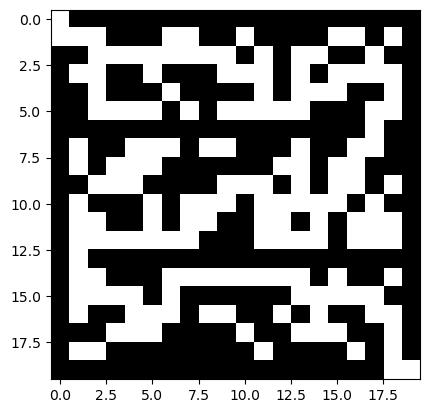

In [6]:
maze_2 = maze.copy()
I = get_incidence(maze_2)

for i in range(300):
    maze_2, I = enhance_maze(maze_2, I)


plt.imshow(maze_2, cmap=plt.cm.binary, interpolation='nearest')

In [7]:
import networkx as nx

In [8]:
# Convert incidence matrix to a graph
incidence_matrix = I
G = nx.DiGraph(incidence_matrix)

# Check if there is a path from the first to last node
print(nx.has_path(G, 0, n*n-1))



True


In [9]:
type(G)

networkx.classes.digraph.DiGraph

In [11]:
G.number_of_nodes()

400